In [207]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
data1=pd.read_excel('Data_Train.xlsx')
data2=pd.read_excel('Test_Set.xlsx')

In [3]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data1['Route'].isna().sum()

1

In [7]:
data1['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [8]:
data1.duplicated().sum()

220

In [9]:
data1.drop_duplicates(inplace=True)

In [10]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [12]:
data1[data1['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
data1.dropna(inplace=True)

In [14]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
data1['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
data1[data1['Airline']=='Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,03/03/2019,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,non-stop,No info,11793
7657,Vistara Premium economy,1/03/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,9125
8615,Vistara Premium economy,6/04/2019,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,non-stop,No info,5969


In [17]:
data1[data1['Airline']=='Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [18]:
data1[data1['Airline']=='Vistara']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
28,Vistara,18/06/2019,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668
29,Vistara,15/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
30,Vistara,18/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
57,Vistara,6/03/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,7414
59,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,15:40,16:45 07 Mar,25h 5m,1 stop,No info,12395
...,...,...,...,...,...,...,...,...,...,...,...
10624,Vistara,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,22:40 07 Jun,26h 20m,1 stop,No info,8662
10656,Vistara,6/04/2019,Banglore,Delhi,BLR → DEL,07:00,09:40,2h 40m,non-stop,No info,5613
10659,Vistara,1/05/2019,Banglore,Delhi,BLR → DEL,21:00,23:50,2h 50m,non-stop,No info,4668
10660,Vistara,21/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 19 Mar,2h 55m,non-stop,No info,4878


In [19]:
data1['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [20]:
data1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [21]:
a=[]
for i in data1['Date_of_Journey']:
    if i[0]!='/':
        if i[1]!='/':
            i=i[3:]
    if i[1]=='/':
        i=i[2:]
    a.append(i)
print(a)
    

['03/2019', '05/2019', '06/2019', '05/2019', '03/2019', '06/2019', '03/2019', '03/2019', '03/2019', '05/2019', '06/2019', '04/2019', '06/2019', '05/2019', '04/2019', '03/2019', '04/2019', '06/2019', '06/2019', '05/2019', '03/2019', '03/2019', '04/2019', '05/2019', '05/2019', '06/2019', '06/2019', '05/2019', '06/2019', '06/2019', '06/2019', '05/2019', '04/2019', '06/2019', '05/2019', '06/2019', '05/2019', '05/2019', '03/2019', '06/2019', '05/2019', '03/2019', '05/2019', '05/2019', '03/2019', '03/2019', '05/2019', '05/2019', '05/2019', '06/2019', '03/2019', '05/2019', '03/2019', '06/2019', '04/2019', '03/2019', '03/2019', '03/2019', '05/2019', '03/2019', '06/2019', '04/2019', '06/2019', '05/2019', '05/2019', '06/2019', '04/2019', '05/2019', '05/2019', '03/2019', '06/2019', '03/2019', '06/2019', '06/2019', '03/2019', '03/2019', '04/2019', '04/2019', '06/2019', '03/2019', '06/2019', '03/2019', '05/2019', '06/2019', '05/2019', '03/2019', '06/2019', '06/2019', '04/2019', '05/2019', '05/2019'

In [22]:
new_date=pd.DataFrame(a,columns=['DATE'])

In [23]:
new_date=new_date['DATE'].apply(lambda x:x[0:2])

In [24]:
data1=data1.reset_index().drop(columns='index')

In [25]:
data1=pd.concat([data1,new_date],axis=1)

In [26]:
data1['DATE'].replace({'03':'March','06':'June','05':'May','04':'April'},inplace=True)

In [27]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March
...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,April
10458,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April
10459,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April
10460,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,March


In [28]:
pd.DataFrame(data1['Route'].value_counts()==1)

,Route
DEL → BOM → COK,False
BLR → DEL,False
CCU → BOM → BLR,False
CCU → BLR,False
BOM → HYD,False
...,...
CCU → VTZ → BLR,True
CCU → IXZ → MAA → BLR,True
BOM → COK → MAA → HYD,True
BOM → CCU → HYD,True


In [29]:
data1[data1['Route']=='BOM → BBI → HYD']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE
9654,Air India,6/03/2019,Mumbai,Hyderabad,BOM → BBI → HYD,12:00,12:25 07 Mar,24h 25m,1 stop,No info,14408,March


In [30]:
data1['DATE'].isna().sum()

0

In [31]:
Airlines=pd.get_dummies(data1['Airline'])

In [32]:
data1['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
data1['Source'].replace({'Delhi':'DELHI-DEP','Kolkata':'KOLKATA-DEP','Banglore':'BANGLORE-DEP','Mumbai':'MUMBAI-DEP','Chennai':'CHENNAI-DEP'},inplace=True)

In [34]:
data1['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
source=pd.get_dummies(data1['Source'])

In [36]:
destination=pd.get_dummies(data1['Destination'])

In [37]:
data1['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
22:25      1
16:25      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [38]:
data1['Dep_Time'].apply(lambda x: x.split(':'))

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10457    [19, 55]
10458    [20, 45]
10459    [08, 20]
10460    [11, 30]
10461    [10, 55]
Name: Dep_Time, Length: 10462, dtype: object

In [39]:
z=pd.DataFrame(data1['Dep_Time'].apply(lambda x: x.split(':')))

In [40]:
z[['hours','minutes']]=pd.DataFrame(z.Dep_Time.tolist(),index=z.index)

In [41]:
z

,Dep_Time,hours,minutes
0,"[22, 20]",22,20
1,"[05, 50]",05,50
2,"[09, 25]",09,25
3,"[18, 05]",18,05
4,"[16, 50]",16,50
...,...,...,...
10457,"[19, 55]",19,55
10458,"[20, 45]",20,45
10459,"[08, 20]",08,20
10460,"[11, 30]",11,30


In [42]:
z['minutes']=z['minutes'].astype(int)

In [43]:
h=[]
for i in z['minutes']:
    if i>30:
        i=1
    else:
        i=0
    h.append(i)
print(h)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [44]:
z['minute']=pd.DataFrame(h)

In [45]:
z

,Dep_Time,hours,minutes,minute
0,"[22, 20]",22,20,0
1,"[05, 50]",05,50,1
2,"[09, 25]",09,25,0
3,"[18, 05]",18,5,0
4,"[16, 50]",16,50,1
...,...,...,...,...
10457,"[19, 55]",19,55,1
10458,"[20, 45]",20,45,1
10459,"[08, 20]",08,20,0
10460,"[11, 30]",11,30,0


In [46]:
z['hours']=z['hours'].astype(int)

In [47]:
total=[]
for i in z['hours'],z['minute']:
    i=z['hours']+z['minute']
total.append(i)
    

In [48]:
total

[0        22
 1         6
 2         9
 3        18
 4        17
          ..
 10457    20
 10458    21
 10459     8
 10460    11
 10461    11
 Length: 10462, dtype: int64]

In [49]:
zotal=pd.DataFrame(total).transpose()

In [50]:
zotal['departure']=pd.DataFrame(total).transpose()

In [51]:
data1['departure']=zotal['departure']

In [52]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure
0,IndiGo,24/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,22
1,Air India,1/05/2019,KOLKATA-DEP,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May,6
2,Jet Airways,9/06/2019,DELHI-DEP,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June,9
3,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May,18
4,IndiGo,01/03/2019,BANGLORE-DEP,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,April,20
10458,Air India,27/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April,21
10459,Jet Airways,27/04/2019,BANGLORE-DEP,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April,8
10460,Vistara,01/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,March,11


In [53]:
data1['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [54]:
data1['Duration'].apply(lambda x: x.split(' '))

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10457    [2h, 30m]
10458    [2h, 35m]
10459         [3h]
10460    [2h, 40m]
10461    [8h, 20m]
Name: Duration, Length: 10462, dtype: object

In [55]:
duration=pd.DataFrame(data1['Duration'].apply(lambda x: x.split(' ')))

In [56]:
duration

,Duration
0,"[2h, 50m]"
1,"[7h, 25m]"
2,[19h]
3,"[5h, 25m]"
4,"[4h, 45m]"
...,...
10457,"[2h, 30m]"
10458,"[2h, 35m]"
10459,[3h]
10460,"[2h, 40m]"


In [57]:
duration[['hours','min']]=pd.DataFrame(duration.Duration.tolist())

In [58]:
duration

,Duration,hours,min
0,"[2h, 50m]",2h,50m
1,"[7h, 25m]",7h,25m
2,[19h],19h,None
3,"[5h, 25m]",5h,25m
4,"[4h, 45m]",4h,45m
...,...,...,...
10457,"[2h, 30m]",2h,30m
10458,"[2h, 35m]",2h,35m
10459,[3h],3h,None
10460,"[2h, 40m]",2h,40m


In [59]:
duration['hours']=duration['hours'].apply(lambda x: x[0:-1])

In [60]:
duration['min'].isna().sum()

1006

In [61]:
duration['min'].fillna('0m',inplace=True)

In [62]:
duration['min']=duration['min'].apply(lambda x: x[0:-1])

In [63]:
duration['hours']=duration['hours'].astype(int)

In [64]:
duration['hours']=duration['hours'].apply(lambda x:x*60 )

In [65]:
duration['hours']

0         120
1         420
2        1140
3         300
4         240
         ... 
10457     120
10458     120
10459     180
10460     120
10461     480
Name: hours, Length: 10462, dtype: int64

In [66]:
duration['min']=duration['min'].astype(int)

In [67]:
duration['totalmin']=duration[['hours','min']].sum(axis=1)

In [68]:
duration

,Duration,hours,min,totalmin
0,"[2h, 50m]",120,50,170
1,"[7h, 25m]",420,25,445
2,[19h],1140,0,1140
3,"[5h, 25m]",300,25,325
4,"[4h, 45m]",240,45,285
...,...,...,...,...
10457,"[2h, 30m]",120,30,150
10458,"[2h, 35m]",120,35,155
10459,[3h],180,0,180
10460,"[2h, 40m]",120,40,160


In [69]:
data1['duration']=duration['totalmin']

In [70]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure,duration
0,IndiGo,24/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,22,170
1,Air India,1/05/2019,KOLKATA-DEP,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May,6,445
2,Jet Airways,9/06/2019,DELHI-DEP,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June,9,1140
3,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May,18,325
4,IndiGo,01/03/2019,BANGLORE-DEP,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March,17,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,April,20,150
10458,Air India,27/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April,21,155
10459,Jet Airways,27/04/2019,BANGLORE-DEP,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April,8,180
10460,Vistara,01/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,March,11,160


In [71]:
data1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [72]:
data1['Total_Stops'].replace({'non-stop':'1','1 stop':'2','2 stops':'3','3 stops':'4','4 stops':'5'},inplace=True)

In [73]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure,duration
0,IndiGo,24/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,1,No info,3897,March,22,170
1,Air India,1/05/2019,KOLKATA-DEP,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,3,No info,7662,May,6,445
2,Jet Airways,9/06/2019,DELHI-DEP,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,3,No info,13882,June,9,1140
3,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,2,No info,6218,May,18,325
4,IndiGo,01/03/2019,BANGLORE-DEP,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,2,No info,13302,March,17,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,19:55,22:25,2h 30m,1,No info,4107,April,20,150
10458,Air India,27/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,20:45,23:20,2h 35m,1,No info,4145,April,21,155
10459,Jet Airways,27/04/2019,BANGLORE-DEP,Delhi,BLR → DEL,08:20,11:20,3h,1,No info,7229,April,8,180
10460,Vistara,01/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,11:30,14:10,2h 40m,1,No info,12648,March,11,160


In [74]:
data1['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [75]:
data1['Additional_Info'].replace({'No info':'No Info'},inplace=True)

In [76]:
data1['Total_Stops']=data1['Total_Stops'].astype(int)

In [77]:
add_info=pd.get_dummies(data1['Additional_Info'])

In [78]:
date_journey=pd.get_dummies(data1['DATE'])

In [79]:
new_data=pd.concat([Airlines,date_journey,source,destination,add_info,data1],axis=1)

In [80]:
new_data

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure,duration
0,0,0,0,1,0,0,0,0,0,0,...,BLR → DEL,22:20,01:10 22 Mar,2h 50m,1,No Info,3897,March,22,170
1,0,1,0,0,0,0,0,0,0,0,...,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,3,No Info,7662,May,6,445
2,0,0,0,0,1,0,0,0,0,0,...,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,3,No Info,13882,June,9,1140
3,0,0,0,1,0,0,0,0,0,0,...,CCU → NAG → BLR,18:05,23:30,5h 25m,2,No Info,6218,May,18,325
4,0,0,0,1,0,0,0,0,0,0,...,BLR → NAG → DEL,16:50,21:35,4h 45m,2,No Info,13302,March,17,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,0,...,CCU → BLR,19:55,22:25,2h 30m,1,No Info,4107,April,20,150
10458,0,1,0,0,0,0,0,0,0,0,...,CCU → BLR,20:45,23:20,2h 35m,1,No Info,4145,April,21,155
10459,0,0,0,0,1,0,0,0,0,0,...,BLR → DEL,08:20,11:20,3h,1,No Info,7229,April,8,180
10460,0,0,0,0,0,0,0,0,0,0,...,BLR → DEL,11:30,14:10,2h 40m,1,No Info,12648,March,11,160


In [81]:
dep=[]
for i in new_data['departure']:
    if i<=8:
        i=1
    if (i>8)&(i<=16):
        i=2
    if(i>16)&(i<=24):
        i=3
    dep.append(i)
    

In [82]:
depar=pd.DataFrame(dep)

In [83]:
new_data['departure']=pd.DataFrame(dep)

In [84]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure,duration
0,IndiGo,24/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,1,No Info,3897,March,22,170
1,Air India,1/05/2019,KOLKATA-DEP,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,3,No Info,7662,May,6,445
2,Jet Airways,9/06/2019,DELHI-DEP,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,3,No Info,13882,June,9,1140
3,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,2,No Info,6218,May,18,325
4,IndiGo,01/03/2019,BANGLORE-DEP,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,2,No Info,13302,March,17,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,19:55,22:25,2h 30m,1,No Info,4107,April,20,150
10458,Air India,27/04/2019,KOLKATA-DEP,Banglore,CCU → BLR,20:45,23:20,2h 35m,1,No Info,4145,April,21,155
10459,Jet Airways,27/04/2019,BANGLORE-DEP,Delhi,BLR → DEL,08:20,11:20,3h,1,No Info,7229,April,8,180
10460,Vistara,01/03/2019,BANGLORE-DEP,New Delhi,BLR → DEL,11:30,14:10,2h 40m,1,No Info,12648,March,11,160


In [85]:
del new_data['Route']

In [86]:
new_data['Total_Stops']=new_data['Total_Stops'].astype(int)

In [87]:
del new_data['Airline']

In [88]:
del new_data['Date_of_Journey']

In [89]:
del new_data['Source']

In [90]:
del new_data['Destination']

In [91]:
del new_data['Dep_Time']

In [92]:
del new_data['Arrival_Time']

In [93]:
del new_data['Duration']

In [94]:
del new_data['Additional_Info']

In [95]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air Asia                           10462 non-null  uint8 
 1   Air India                          10462 non-null  uint8 
 2   GoAir                              10462 non-null  uint8 
 3   IndiGo                             10462 non-null  uint8 
 4   Jet Airways                        10462 non-null  uint8 
 5   Jet Airways Business               10462 non-null  uint8 
 6   Multiple carriers                  10462 non-null  uint8 
 7   Multiple carriers Premium economy  10462 non-null  uint8 
 8   SpiceJet                           10462 non-null  uint8 
 9   Trujet                             10462 non-null  uint8 
 10  Vistara                            10462 non-null  uint8 
 11  Vistara Premium economy            10462 non-null  uint8 
 12  Apri

In [96]:
new_data['Total_Stops']=new_data['Total_Stops'].astype(int)

In [97]:
del new_data['DATE']

In [98]:
new_data

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Total_Stops,Price,departure,duration
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,3897,3,170
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,3,7662,1,445
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3,13882,2,1140
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2,6218,3,325
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2,13302,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,4107,3,150
10458,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,4145,3,155
10459,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,7229,1,180
10460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,12648,2,160


# pre processing the Test Data

In [99]:
data3=data2.copy()

In [100]:
y_sample=pd.read_excel('Sample_submission.xlsx')

In [101]:
data2=pd.concat([data3,y_sample],axis=1)

In [102]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [103]:
data2.describe()

,Price
count,2671.000000
mean,20159.514414
std,5005.399225
min,10138.000000
25%,16469.500000
50%,19582.000000
75%,23476.500000
max,64881.000000


In [104]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Price            2671 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [105]:
data2.duplicated().sum()

0

In [106]:
data2.drop_duplicates(inplace=True)

In [107]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [108]:
data2=data2.reset_index().drop(columns='index')

In [109]:
Alines=pd.get_dummies(data2['Airline'])

In [110]:
data2['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [111]:
data2['Source'].replace({'Delhi':'DELHI-DEP','Kolkata':'KOLKATA-DEP','Banglore':'BANGLORE-DEP','Mumbai':'MUMBAI-DEP','Chennai':'CHENNAI-DEP'},inplace=True)

In [112]:
sorce=pd.get_dummies(data2['Source'])

In [113]:
Destin=pd.get_dummies(data2['Destination'])

In [114]:
u=[]
for i in data2['Date_of_Journey']:
    if len(i)==10:
        i=i[3:5]
    else:
        i=i[2:4]
    u.append(i)

In [115]:
u

['06',
 '05',
 '05',
 '05',
 '06',
 '06',
 '03',
 '05',
 '03',
 '05',
 '03',
 '06',
 '05',
 '03',
 '06',
 '03',
 '06',
 '03',
 '06',
 '03',
 '03',
 '05',
 '03',
 '05',
 '04',
 '03',
 '05',
 '05',
 '06',
 '06',
 '03',
 '03',
 '06',
 '06',
 '03',
 '06',
 '03',
 '03',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '05',
 '03',
 '03',
 '05',
 '04',
 '06',
 '05',
 '04',
 '03',
 '03',
 '06',
 '04',
 '05',
 '03',
 '06',
 '05',
 '06',
 '03',
 '04',
 '06',
 '03',
 '05',
 '06',
 '06',
 '06',
 '03',
 '06',
 '05',
 '04',
 '05',
 '05',
 '05',
 '06',
 '05',
 '03',
 '05',
 '06',
 '06',
 '05',
 '04',
 '05',
 '05',
 '03',
 '06',
 '04',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '05',
 '06',
 '06',
 '03',
 '05',
 '03',
 '05',
 '03',
 '05',
 '03',
 '06',
 '05',
 '03',
 '03',
 '05',
 '03',
 '03',
 '06',
 '06',
 '05',
 '05',
 '03',
 '04',
 '03',
 '04',
 '05',
 '03',
 '05',
 '05',
 '06',
 '05',
 '05',
 '04',
 '05',
 '05',
 '03',
 '06',
 '05',
 '05',
 '04',
 '05',
 '04',
 '06',
 '04',
 '03',
 '03',
 '03',
 '05',

In [116]:
DATE=pd.DataFrame(u)

In [117]:
data2['DATE']=pd.DataFrame(u)

In [118]:
data2['DATE'].replace({'03':'March','06':'June','05':'May','04':'April'},inplace=True)

In [119]:
dat_journey=pd.get_dummies(data2['DATE'])

In [120]:
dep_time=pd.DataFrame(data2['Dep_Time'].apply(lambda x:x.split(':')))

In [121]:
dep_time

,Dep_Time
0,"[17, 30]"
1,"[06, 20]"
2,"[19, 15]"
3,"[08, 00]"
4,"[23, 55]"
...,...
2666,"[20, 30]"
2667,"[14, 20]"
2668,"[21, 50]"
2669,"[04, 00]"


In [122]:
dep_time[['hours','min']]=pd.DataFrame(dep_time.Dep_Time.tolist())

In [123]:
dep_time

,Dep_Time,hours,min
0,"[17, 30]",17,30
1,"[06, 20]",06,20
2,"[19, 15]",19,15
3,"[08, 00]",08,00
4,"[23, 55]",23,55
...,...,...,...
2666,"[20, 30]",20,30
2667,"[14, 20]",14,20
2668,"[21, 50]",21,50
2669,"[04, 00]",04,00


In [124]:
dep_time['min']=dep_time['min'].astype(int)

In [125]:
dep_time['hours']=dep_time['hours'].astype(int)

In [126]:
j=[]
for i in dep_time['min']:
    if i>30:
        i=1
    else:
        i=0
    j.append(i)
print(j)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [127]:
dep_time['minute']=pd.DataFrame(j)

In [128]:
j

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [129]:
dep_time

,Dep_Time,hours,min,minute
0,"[17, 30]",17,30,0
1,"[06, 20]",6,20,0
2,"[19, 15]",19,15,0
3,"[08, 00]",8,0,0
4,"[23, 55]",23,55,1
...,...,...,...,...
2666,"[20, 30]",20,30,0
2667,"[14, 20]",14,20,0
2668,"[21, 50]",21,50,1
2669,"[04, 00]",4,0,0


In [130]:
dep_time['departure']=dep_time[['hours','minute']].sum(axis=1)

In [131]:
dep_time

,Dep_Time,hours,min,minute,departure
0,"[17, 30]",17,30,0,17
1,"[06, 20]",6,20,0,6
2,"[19, 15]",19,15,0,19
3,"[08, 00]",8,0,0,8
4,"[23, 55]",23,55,1,24
...,...,...,...,...,...
2666,"[20, 30]",20,30,0,20
2667,"[14, 20]",14,20,0,14
2668,"[21, 50]",21,50,1,22
2669,"[04, 00]",4,0,0,4


In [132]:
data2['departure']=dep_time['departure']

In [133]:
depa=[]
for i in data2['departure']:
    if i<=8:
        i=1
    if (i>8)&(i<=16):
        i=2
    if(i>16)&(i<=24):
        i=3
    depa.append(i)
    

In [134]:
depa

[3,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 2,


In [135]:
data2['departure']=pd.DataFrame(depa)

In [136]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure
0,Jet Airways,6/06/2019,DELHI-DEP,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998,June,3
1,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612,May,1
2,Jet Airways,21/05/2019,DELHI-DEP,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572,May,3
3,Multiple carriers,21/05/2019,DELHI-DEP,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778,May,1
4,Air Asia,24/06/2019,BANGLORE-DEP,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934,June,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,KOLKATA-DEP,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046,June,3
2667,IndiGo,27/03/2019,KOLKATA-DEP,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086,March,2
2668,Jet Airways,6/03/2019,DELHI-DEP,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720,March,3
2669,Air India,6/03/2019,DELHI-DEP,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544,March,1


In [137]:
duratio=pd.DataFrame(data2['Duration'].apply(lambda x:x.split(" ")))

In [138]:
duratio

,Duration
0,"[10h, 55m]"
1,[4h]
2,"[23h, 45m]"
3,[13h]
4,"[2h, 50m]"
...,...
2666,"[23h, 55m]"
2667,"[2h, 35m]"
2668,"[6h, 35m]"
2669,"[15h, 15m]"


In [139]:
duratio[['hours','min']]=pd.DataFrame(duratio.Duration.tolist())

In [140]:
duratio

,Duration,hours,min
0,"[10h, 55m]",10h,55m
1,[4h],4h,None
2,"[23h, 45m]",23h,45m
3,[13h],13h,None
4,"[2h, 50m]",2h,50m
...,...,...,...
2666,"[23h, 55m]",23h,55m
2667,"[2h, 35m]",2h,35m
2668,"[6h, 35m]",6h,35m
2669,"[15h, 15m]",15h,15m


In [141]:
duratio['min'].fillna('0m',inplace=True)

In [142]:
duratio['hours'].dtype

dtype('O')

In [143]:
duratio['hours']=duratio['hours'].apply(lambda x: x[0:-1])

In [144]:
duratio['min']=duratio['min'].apply(lambda x: x[0:-1])

In [145]:
duratio['hours']=duratio['hours'].astype(int)

In [146]:
duratio['hours']=duratio['hours'].apply(lambda x: x*60)

In [147]:
duratio['hours']

0        600
1        240
2       1380
3        780
4        120
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: hours, Length: 2671, dtype: int64

In [148]:
duratio['min']=duratio['min'].astype(int)

In [149]:
duratio['duration']=duratio[['hours','min']].sum(axis=1)

In [150]:
duratio

,Duration,hours,min,duration
0,"[10h, 55m]",600,55,655
1,[4h],240,0,240
2,"[23h, 45m]",1380,45,1425
3,[13h],780,0,780
4,"[2h, 50m]",120,50,170
...,...,...,...,...
2666,"[23h, 55m]",1380,55,1435
2667,"[2h, 35m]",120,35,155
2668,"[6h, 35m]",360,35,395
2669,"[15h, 15m]",900,15,915


In [151]:
data2['duration']=duratio['duration']

In [152]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATE,departure,duration
0,Jet Airways,6/06/2019,DELHI-DEP,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998,June,3,655
1,IndiGo,12/05/2019,KOLKATA-DEP,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612,May,1,240
2,Jet Airways,21/05/2019,DELHI-DEP,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572,May,3,1425
3,Multiple carriers,21/05/2019,DELHI-DEP,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778,May,1,780
4,Air Asia,24/06/2019,BANGLORE-DEP,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934,June,3,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,KOLKATA-DEP,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046,June,3,1435
2667,IndiGo,27/03/2019,KOLKATA-DEP,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086,March,2,155
2668,Jet Airways,6/03/2019,DELHI-DEP,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720,March,3,395
2669,Air India,6/03/2019,DELHI-DEP,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544,March,1,915


In [153]:
data2['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [154]:
data2['Total_Stops'].replace({'non-stop':1,'1 stop':2,'2 stops':3,'3 stops':4,'4 stops':5},inplace=True)

In [155]:
ad_info=pd.get_dummies(data2['Additional_Info'])

In [156]:
ad_info.rename(columns={'No info':'No Info'},inplace=True)

In [157]:
ad_info

,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No Info
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2666,0,0,0,0,0,1
2667,0,0,0,0,0,1
2668,0,0,0,0,0,1
2669,0,0,0,0,0,1


In [158]:
new_data2=pd.concat([Alines,dat_journey,sorce,Destin,ad_info,data2],axis=1)

In [159]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air Asia                           2671 non-null   uint8 
 1   Air India                          2671 non-null   uint8 
 2   GoAir                              2671 non-null   uint8 
 3   IndiGo                             2671 non-null   uint8 
 4   Jet Airways                        2671 non-null   uint8 
 5   Jet Airways Business               2671 non-null   uint8 
 6   Multiple carriers                  2671 non-null   uint8 
 7   Multiple carriers Premium economy  2671 non-null   uint8 
 8   SpiceJet                           2671 non-null   uint8 
 9   Vistara                            2671 non-null   uint8 
 10  Vistara Premium economy            2671 non-null   uint8 
 11  April                              2671 non-null   uint8 
 12  June  

In [160]:
del new_data2['Airline']

In [161]:
del new_data2['Date_of_Journey']

In [162]:
del new_data2['Source']

In [163]:
del new_data2['Destination']

In [164]:
del new_data2['Route']

In [165]:
del new_data2['Dep_Time']

In [166]:
del new_data2['Arrival_Time']

In [167]:
del new_data2['Duration']

In [168]:
del new_data2['Additional_Info']

In [169]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air Asia                           2671 non-null   uint8 
 1   Air India                          2671 non-null   uint8 
 2   GoAir                              2671 non-null   uint8 
 3   IndiGo                             2671 non-null   uint8 
 4   Jet Airways                        2671 non-null   uint8 
 5   Jet Airways Business               2671 non-null   uint8 
 6   Multiple carriers                  2671 non-null   uint8 
 7   Multiple carriers Premium economy  2671 non-null   uint8 
 8   SpiceJet                           2671 non-null   uint8 
 9   Vistara                            2671 non-null   uint8 
 10  Vistara Premium economy            2671 non-null   uint8 
 11  April                              2671 non-null   uint8 
 12  June  

In [170]:
del new_data2['DATE']

In [171]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air Asia                           10462 non-null  uint8
 1   Air India                          10462 non-null  uint8
 2   GoAir                              10462 non-null  uint8
 3   IndiGo                             10462 non-null  uint8
 4   Jet Airways                        10462 non-null  uint8
 5   Jet Airways Business               10462 non-null  uint8
 6   Multiple carriers                  10462 non-null  uint8
 7   Multiple carriers Premium economy  10462 non-null  uint8
 8   SpiceJet                           10462 non-null  uint8
 9   Trujet                             10462 non-null  uint8
 10  Vistara                            10462 non-null  uint8
 11  Vistara Premium economy            10462 non-null  uint8
 12  April             

In [172]:
new_data2

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,...,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No Info,Total_Stops,Price,departure,duration
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2,15998,3,655
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,16612,1,240
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,2,25572,3,1425
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2,25778,1,780
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,16934,3,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,14046,3,1435
2667,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,14086,2,155
2668,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2,22720,3,395
2669,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,23544,1,915


In [173]:
train_y=pd.DataFrame(new_data['Price'])

In [174]:
train_y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10457,4107
10458,4145
10459,7229
10460,12648


In [175]:
train_x=new_data.drop(columns='Price')

In [176]:
pd.set_option('display.max_columns',50)

In [177]:
train_x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Total_Stops,departure,duration
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,3,170
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,445
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,1140
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,3,325
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,150
10458,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,155
10459,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,180
10460,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2,160


In [178]:
test_y=pd.DataFrame(new_data2['Price'])

In [179]:
test_y

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [180]:
test_x=pd.DataFrame(new_data2.drop(columns='Price'))

In [181]:
test_x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No Info,Total_Stops,departure,duration
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,655
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,1,240
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,3,1425
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,780
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,3,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,3,1435
2667,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,155
2668,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,395
2669,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,915


In [182]:
test_x['Trujet']=0

In [183]:
test_x['1 Short layover']=0

In [184]:
test_x['2 Long layover']=0

In [185]:
test_x['Red-eye flight']=0

In [186]:
train_x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Total_Stops,departure,duration
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,3,170
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,445
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,1140
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,3,325
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,150
10458,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,155
10459,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,180
10460,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2,160


In [187]:
test_x

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No Info,Total_Stops,departure,duration,Trujet,1 Short layover,2 Long layover,Red-eye flight
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,655,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,1,240,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,3,1425,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,780,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,3,170,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,3,1435,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,155,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,395,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,915,0,0,0,0


In [188]:
test_X=pd.DataFrame(test_x,columns=['Air Asia','Air India','GoAir','IndiGo','Jet Airways','Jet Airways Business','Multiple carriers','Multiple carriers Premium economy','SpiceJet','Trujet','Vistara','Vistara Premium economy','April','June','March','May','BANGLORE-DEP','CHENNAI-DEP','DELHI-DEP','KOLKATA-DEP','MUMBAI-DEP','Banglore','Cochin','Delhi','Hyderabad','Kolkata','New Delhi','1 Long layover','1 Short layover','2 Long layover','Business class','Change airports','In-flight meal not included','No Info','No check-in baggage included','Red-eye flight','Total_Stops','departure','duration'])

In [189]:
scale=StandardScaler()

In [190]:
scale.fit(train_x)

StandardScaler()

In [191]:
train_x_scaled=pd.DataFrame(scale.transform(train_x),columns=train_x.columns)

In [192]:
test_x_scaled=pd.DataFrame(scale.transform(test_X),columns=test_X.columns)

In [193]:
train_x_scaled

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Total_Stops,departure,duration
0,-0.177342,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,1.949688,-0.194406,-0.842802,-0.613365,-0.267165,-0.613365,-0.842802,-0.37087,-0.267165,-0.194406,3.232087,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,1.201946,-0.918429
1,-0.177342,2.275064,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,-0.586548,1.442772,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,1.813062,-1.313761,-0.369141
2,-0.177342,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,1.469616,-0.586548,-0.693110,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,1.813062,-0.055907,1.019059
3,-0.177342,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,-0.586548,1.442772,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,1.201946,-0.608830
4,-0.177342,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,1.949688,-0.194406,-0.842802,-0.613365,-0.267165,-0.613365,-0.842802,-0.37087,-0.267165,-0.194406,3.232087,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,1.201946,-0.688727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,5.638815,-0.439548,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,2.950425,-0.680450,-0.586548,-0.693110,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,1.201946,-0.958377
10458,-0.177342,2.275064,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,2.950425,-0.680450,-0.586548,-0.693110,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,1.201946,-0.948390
10459,-0.177342,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,2.950425,-0.680450,-0.586548,-0.693110,1.949688,-0.194406,-0.842802,-0.613365,-0.267165,-0.613365,-0.842802,2.69636,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,-1.313761,-0.898455
10460,-0.177342,-0.439548,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,4.570233,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,1.949688,-0.194406,-0.842802,-0.613365,-0.267165,-0.613365,-0.842802,-0.37087,-0.267165,-0.194406,3.232

In [194]:
test_x_scaled

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,April,June,March,May,BANGLORE-DEP,CHENNAI-DEP,DELHI-DEP,KOLKATA-DEP,MUMBAI-DEP,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Total_Stops,departure,duration
0,-0.177342,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,1.469616,-0.586548,-0.693110,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,1.201946,0.050315
1,-0.177342,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,-0.586548,1.442772,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,-1.313761,-0.778610
2,-0.177342,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,-0.586548,1.442772,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,2.105228,-1.895954,-0.177055,-0.009777,0.299235,1.201946,1.588321
3,-0.177342,-0.439548,-0.137454,-0.492611,-0.739713,-0.023955,2.783432,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,-0.586548,1.442772,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,-1.313761,0.299991
4,5.638815,-0.439548,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,1.469616,-0.586548,-0.693110,1.949688,-0.194406,-0.842802,-0.613365,-0.267165,-0.613365,-0.842802,2.69636,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,1.201946,-0.918429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-0.177342,2.275064,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,1.469616,-0.586548,-0.693110,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,1.201946,1.608295
2667,-0.177342,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,-0.512902,-0.194406,-0.842802,1.630350,-0.267165,1.630350,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,-1.214593,-0.055907,-0.948390
2668,-0.177342,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.042654,-0.009777,-0.009777,-0.019557,-0.025875,-0.475008,0.527439,-0.177055,-0.009777,0.299235,1.201946,-0.469012
2669,-0.177342,2.275064,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.338934,-0.680450,1.704889,-0.693110,-0.512902,-0.194406,1.186518,-0.613365,-0.267165,-0.613365,1.186518,-0.37087,-0.267165,-0.194406,-0.309398,-0.04

<Axes: >

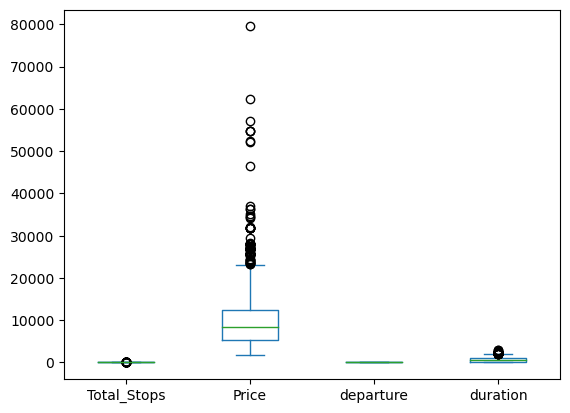

In [195]:
data1.plot(kind='box')

<Axes: >

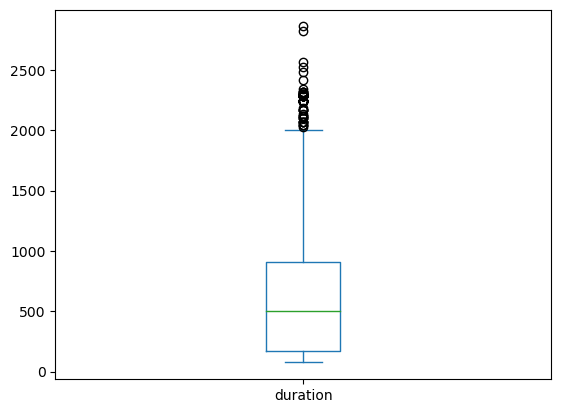

In [196]:
data1['duration'].plot(kind='box')

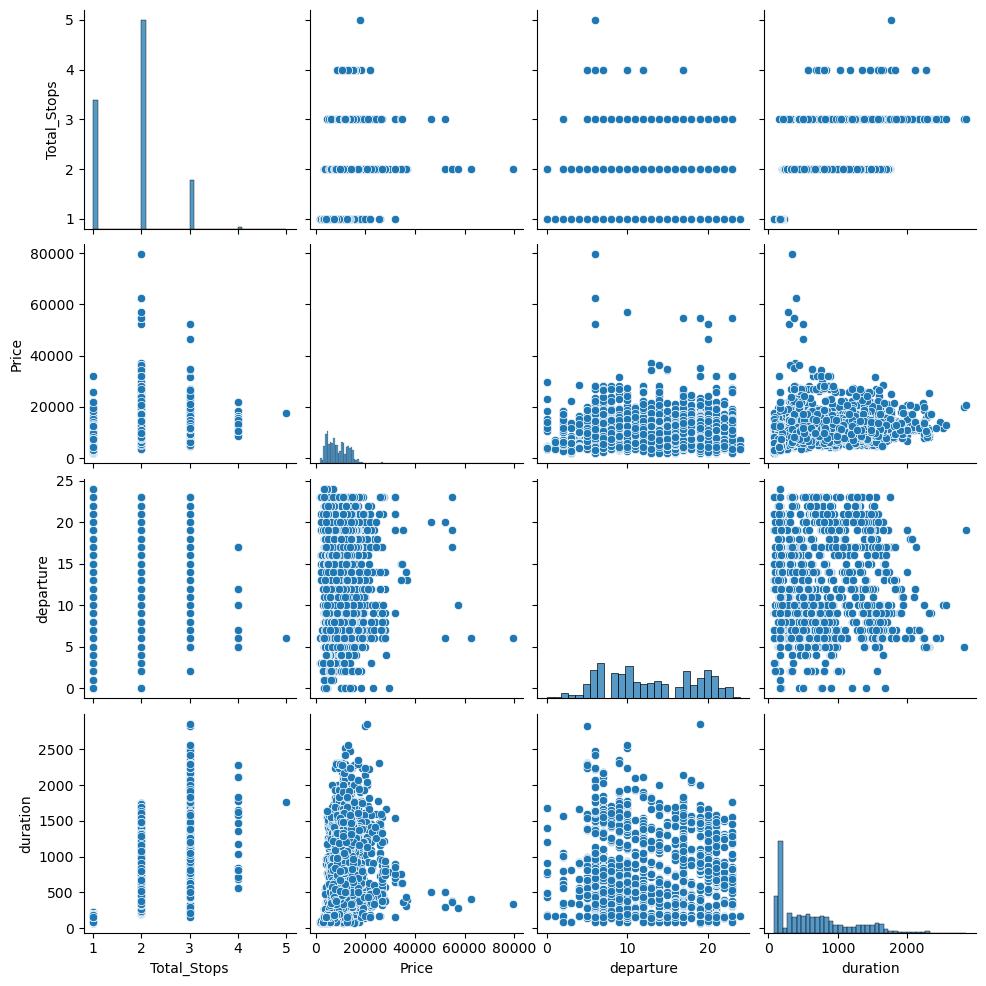

In [197]:
sns.pairplot(data1)

In [198]:
data1.corr()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_5172\3734675979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,Total_Stops,Price,departure,duration
Total_Stops,1.000000,0.602013,-0.066298,0.728123
Price,0.602013,1.000000,0.004368,0.501886
departure,-0.066298,0.004368,1.000000,-0.002708
duration,0.728123,0.501886,-0.002708,1.000000


C:\Users\Muthu\AppData\Local\Temp\ipykernel_5172\3759370572.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True)


<Axes: >

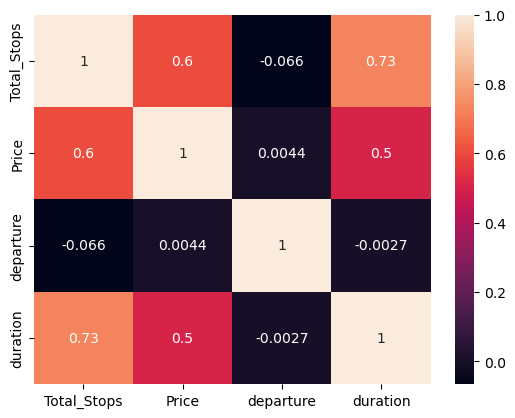

In [199]:
sns.heatmap(data1.corr(),annot=True)

In [202]:
[variance_inflation_factor(data1[['Total_Stops','departure','duration']].values, i) for i in range(data1[['Total_Stops','departure','duration']].shape[1])]

[8.710520594533978, 3.6645523942319898, 4.995598278784941]

# MODELING

# duration vs price

<Axes: xlabel='duration', ylabel='Price'>

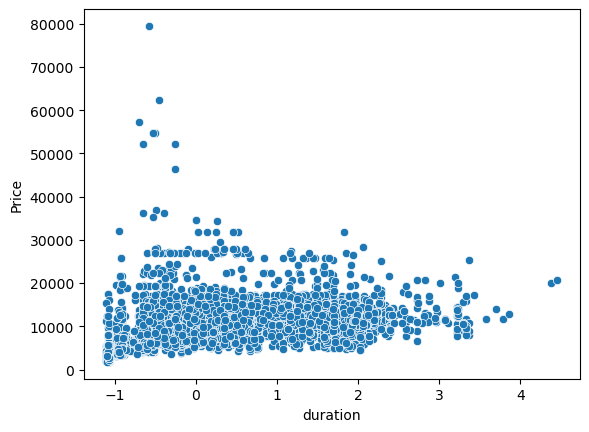

In [206]:
sns.scatterplot(x=train_x_scaled['duration'],y=train_y['Price'])

In [208]:
reg = LinearRegression()

In [209]:
reg.fit(train_x_scaled[['duration']],train_y)

LinearRegression()

In [210]:
reg.intercept_

array([9026.79028866])

In [211]:
reg.coef_

array([[2321.0361329]])

In [212]:
train_predict_duration=reg.predict(train_x_scaled[['duration']])

Text(0, 0.5, 'Price')

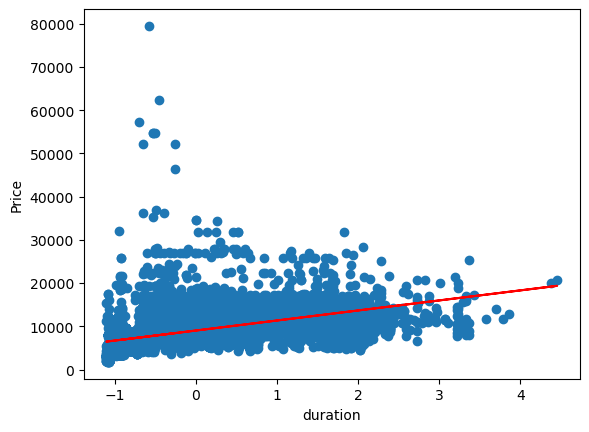

In [213]:
plt.scatter(train_x_scaled['duration'],train_y)
plt.plot(train_x_scaled['duration'],reg.predict(train_x_scaled[['duration']]),color='red')
plt.xlabel('duration')
plt.ylabel('Price')

In [214]:
test_predict_duration = reg.predict(test_x_scaled[['duration']])

In [216]:
test_predict_duration

array([[ 9143.57366813],
       [ 7219.60803812],
       [12713.3412226 ],
       ...,
       [ 7938.19761078],
       [10348.94972548],
       [10093.96632874]])

Text(0, 0.5, 'Price')

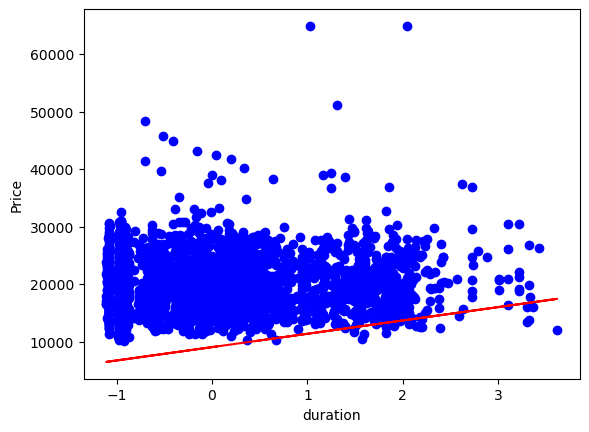

In [217]:
plt.scatter(test_x_scaled['duration'], test_y, color = 'blue')
plt.plot(test_x_scaled['duration'], reg.predict(test_x_scaled[['duration']]), color = 'red')
plt.xlabel("duration")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

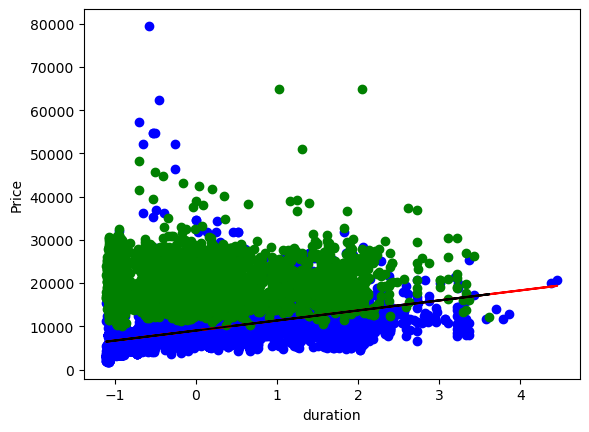

In [218]:
plt.scatter(train_x_scaled['duration'], train_y, color = 'blue')
plt.scatter(test_x_scaled['duration'], test_y, color = 'green')
plt.plot(train_x_scaled['duration'], reg.predict(train_x_scaled[['duration']]), color = 'red')
plt.plot(test_x_scaled['duration'], reg.predict(test_x_scaled[['duration']]), color = 'black')
plt.xlabel("duration")
plt.ylabel('Price')

# Error Metrics for Duration vs Price

In [221]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)

In [223]:
print('TRAIN ERROR')
returnError(train_y,reg.predict(train_x_scaled[['duration']]))

TRAIN ERROR
MSE =  15999980.074022103
RMSE =  3999.9975092519876
MAE =  2861.495430659996
MAPE =  0.3839407871894112
R2 Score =  0.2518895203817154


In [225]:
print('TEST ERROR')
returnError(test_y,reg.predict(test_x_scaled[['duration']]))

TEST ERROR
MSE =  152506981.1363043
RMSE =  12349.371689940517
MAE =  11108.15222673885
MAPE =  0.5260909979374033
R2 Score =  -5.089405664081375


# Modelling No.of.Stops vs price


<Axes: xlabel='Total_Stops', ylabel='Price'>

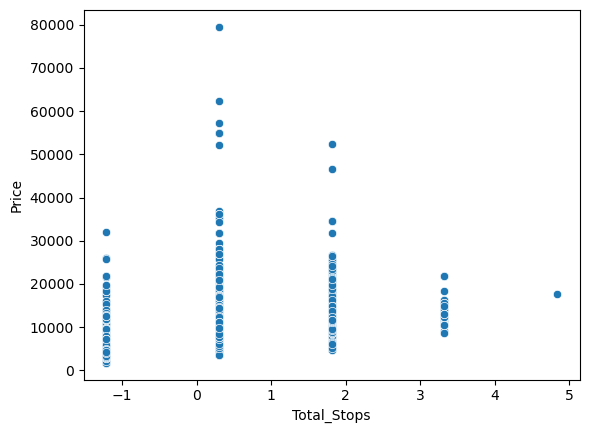

In [226]:
sns.scatterplot(x=train_x_scaled['Total_Stops'],y=train_y['Price'])

In [227]:
reg = LinearRegression()

In [228]:
reg.fit(train_x_scaled[['Total_Stops']],train_y)

LinearRegression()

In [229]:
reg.intercept_

array([9026.79028866])

In [230]:
reg.coef_

array([[2784.08457684]])

In [231]:
train_predict_duration=reg.predict(train_x_scaled[['Total_Stops']])

Text(0, 0.5, 'Price')

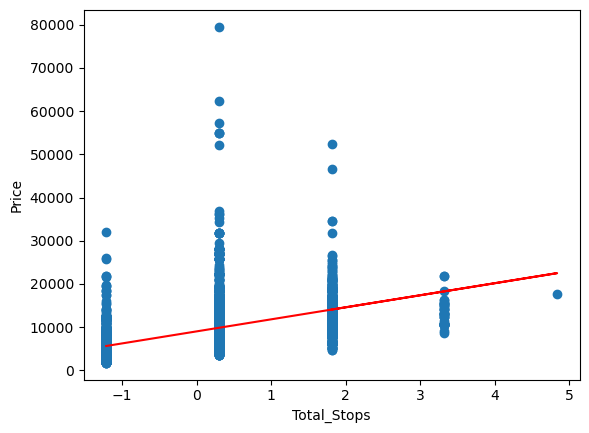

In [232]:
plt.scatter(train_x_scaled['Total_Stops'],train_y)
plt.plot(train_x_scaled['Total_Stops'],reg.predict(train_x_scaled[['Total_Stops']]),color='red')
plt.xlabel('Total_Stops')
plt.ylabel('Price')

In [233]:
test_predict_duration = reg.predict(test_x_scaled[['Total_Stops']])

Text(0, 0.5, 'Price')

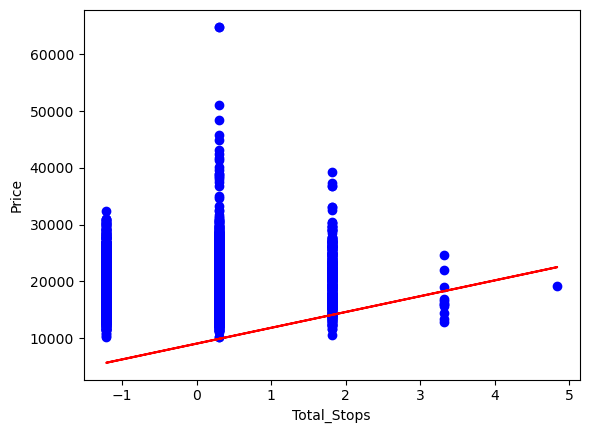

In [234]:
plt.scatter(test_x_scaled['Total_Stops'], test_y, color = 'blue')
plt.plot(test_x_scaled['Total_Stops'], reg.predict(test_x_scaled[['Total_Stops']]), color = 'red')
plt.xlabel("Total_Stops")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

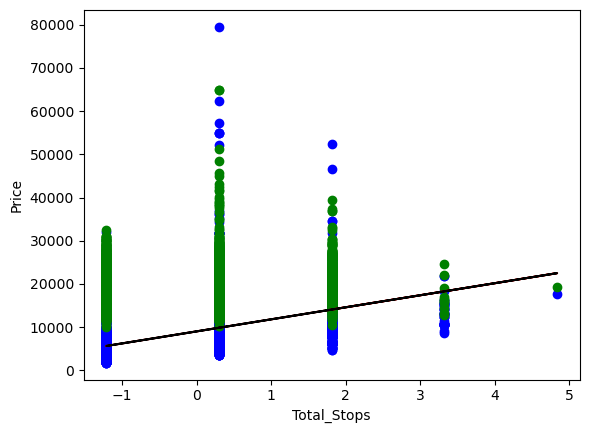

In [235]:
plt.scatter(train_x_scaled['Total_Stops'], train_y, color = 'blue')
plt.scatter(test_x_scaled['Total_Stops'], test_y, color = 'green')
plt.plot(train_x_scaled['Total_Stops'], reg.predict(train_x_scaled[['Total_Stops']]), color = 'red')
plt.plot(test_x_scaled['Total_Stops'], reg.predict(test_x_scaled[['Total_Stops']]), color = 'black')
plt.xlabel("Total_Stops")
plt.ylabel('Price')

# Error metrics for total_stops vs price

In [236]:
print('TRAIN ERROR')
returnError(train_y,reg.predict(train_x_scaled[['Total_Stops']]))

TRAIN ERROR
MSE =  13636061.873240987
RMSE =  3692.7038702339764
MAE =  2575.04380663787
MAPE =  0.330117241922009
R2 Score =  0.36241915671770575


In [237]:
print('TEST ERROR')
returnError(test_y,reg.predict(test_x_scaled[['Total_Stops']]))

TEST ERROR
MSE =  153404827.08517992
RMSE =  12385.67023156922
MAE =  11045.743403897828
MAPE =  0.5231304450506845
R2 Score =  -5.125255486599791


In [238]:
# test error is greater then train error

<Axes: xlabel='departure', ylabel='Price'>

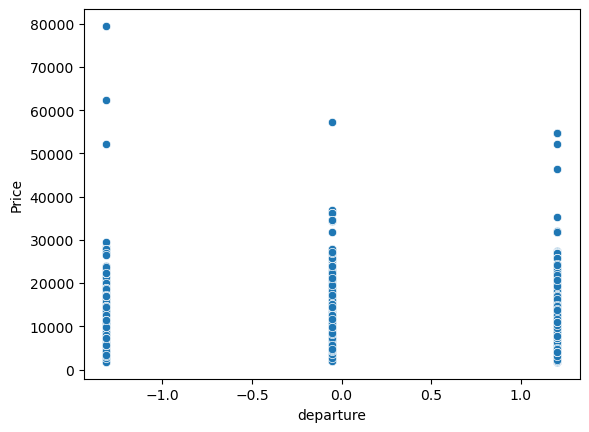

In [239]:
sns.scatterplot(x=train_x_scaled['departure'],y=train_y['Price'])

In [240]:
reg = LinearRegression()

In [241]:
reg.fit(train_x_scaled[['departure']],train_y)

LinearRegression()

In [242]:
reg.intercept_

array([9026.79028866])

In [243]:
reg.coef_

array([[67.19891305]])

In [244]:
train_predict_duration=reg.predict(train_x_scaled[['departure']])

Text(0, 0.5, 'Price')

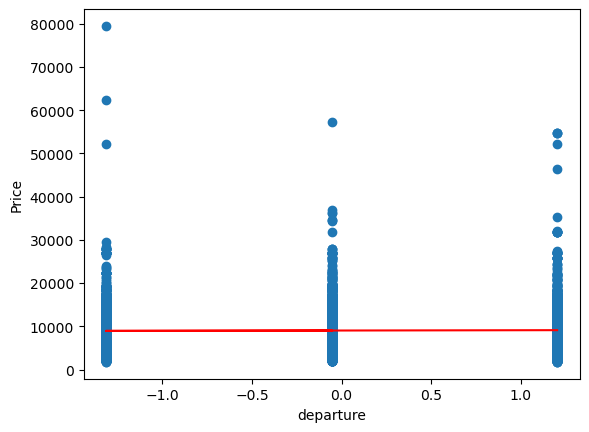

In [245]:
plt.scatter(train_x_scaled['departure'],train_y)
plt.plot(train_x_scaled['departure'],reg.predict(train_x_scaled[['departure']]),color='red')
plt.xlabel('departure')
plt.ylabel('Price')

In [246]:
test_predict_duration = reg.predict(test_x_scaled[['departure']])

Text(0, 0.5, 'Price')

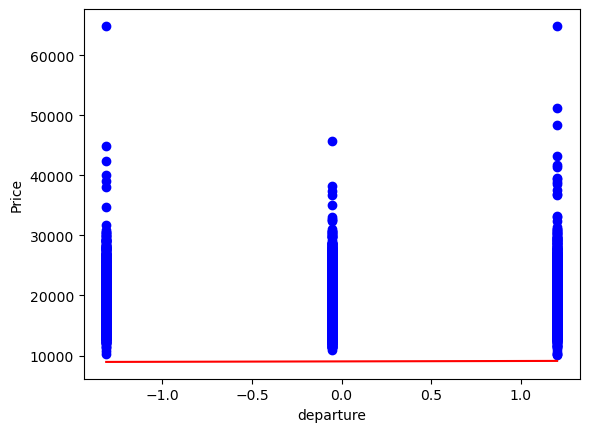

In [247]:
plt.scatter(test_x_scaled['departure'], test_y, color = 'blue')
plt.plot(test_x_scaled['departure'], reg.predict(test_x_scaled[['departure']]), color = 'red')
plt.xlabel("departure")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

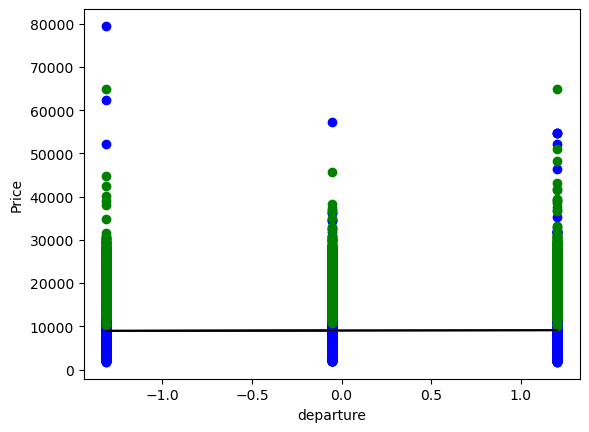

In [248]:
plt.scatter(train_x_scaled['departure'], train_y, color = 'blue')
plt.scatter(test_x_scaled['departure'], test_y, color = 'green')
plt.plot(train_x_scaled['departure'], reg.predict(train_x_scaled[['departure']]), color = 'red')
plt.plot(test_x_scaled['departure'], reg.predict(test_x_scaled[['departure']]), color = 'black')
plt.xlabel("departure")
plt.ylabel('Price')

# Error metrics for departure time vs price

In [249]:
print('TRAIN ERROR')
returnError(train_y,reg.predict(train_x_scaled[['departure']]))

TRAIN ERROR
MSE =  21382673.110318996
RMSE =  4624.140256341604
MAE =  3654.7346490342843
MAPE =  0.5481164063134468
R2 Score =  0.00021114013422096622


In [250]:
print('TEST ERROR')
returnError(test_y,reg.predict(test_x_scaled[['departure']]))

TEST ERROR
MSE =  148950724.7976213
RMSE =  12204.537057898644
MAE =  11131.512616011656
MAPE =  0.5258999038108606
R2 Score =  -4.94740896773115


# multiple linear regression

In [ ]:
reg = LinearRegression()

In [251]:
reg.fit(train_x_scaled, train_y)

LinearRegression()

In [252]:
reg.intercept_

array([9024.22252685])

In [253]:
reg.coef_

array([[-5.56996251e+15, -1.19338532e+16, -4.37036302e+15,
        -1.28421623e+16, -1.54886000e+16, -7.75589874e+14,
        -1.03082622e+16, -1.14125517e+15, -8.68257736e+15,
        -3.16708937e+14, -6.76456621e+15, -5.48503530e+14,
        -4.50203766e+14, -6.88761277e+14, -6.46267689e+14,
        -6.93335086e+14, -2.73092771e+15, -4.66662289e+14,
         2.57941255e+14, -2.99335622e+14,  8.31262530e+14,
        -9.30545279e+14, -1.61775754e+15,  1.29291082e+15,
        -1.51938957e+15, -5.02661235e+13,  1.11977178e+15,
        -5.11808644e+13, -1.17518104e+13, -1.17518104e+13,
        -2.35002505e+13, -3.10834500e+13, -4.65879415e+14,
        -4.96031245e+14, -2.06365150e+14, -1.17518104e+13,
         1.64153512e+03,  1.17819302e+02,  8.11857556e+01]])

In [325]:
Train_Predict=reg.predict(train_x_scaled)

In [301]:
train_predict = pd.DataFrame(reg.predict(train_x_scaled),columns=['Price'])

In [303]:
Train_predict=train_predict['Price'].to_numpy()

In [304]:
test_predict = reg.predict(test_x_scaled)

In [305]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_x_scaled))


TRAIN ERROR
MSE =  6702056.335236423
RMSE =  2588.833006440628
MAE =  1745.301967127479
MAPE =  0.20999671864224453
R2 Score =  0.6866321985286019


In [306]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_x_scaled))


TEST ERROR
MSE =  160969086.41502872
RMSE =  12687.359316068443
MAE =  11146.976577541196
MAPE =  0.528473531321578
R2 Score =  -5.427286536356088


In [307]:
# test error is greater than train error

In [308]:
residual = train_y-train_predict

In [309]:
residual

,Price
0,-3252.435228
1,-3581.444877
2,-1799.158870
3,-1321.383532
4,3648.915419
...,...
10457,615.495498
10458,-1339.315309
10459,-1642.345526
10460,3775.385792


In [310]:
residual['Price'].to_numpy()

array([-3252.43522795, -3581.44487674, -1799.15886976, ...,
       -1642.34552583,  3775.38579222,   371.12434574])

In [314]:
Residual=residual['Price'].to_numpy()

In [315]:
Residual

array([-3252.43522795, -3581.44487674, -1799.15886976, ...,
       -1642.34552583,  3775.38579222,   371.12434574])

<Axes: ylabel='Density'>

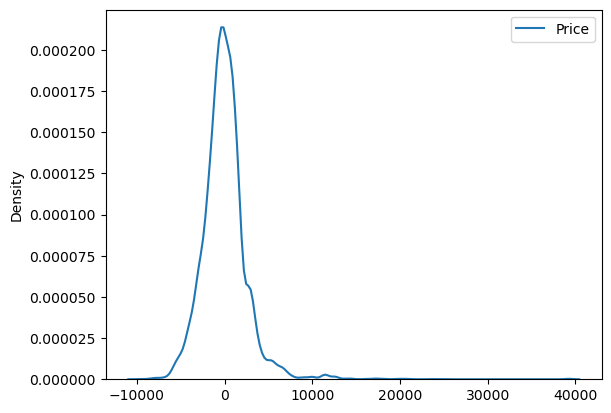

In [316]:
sns.kdeplot(residual)

<Axes: >

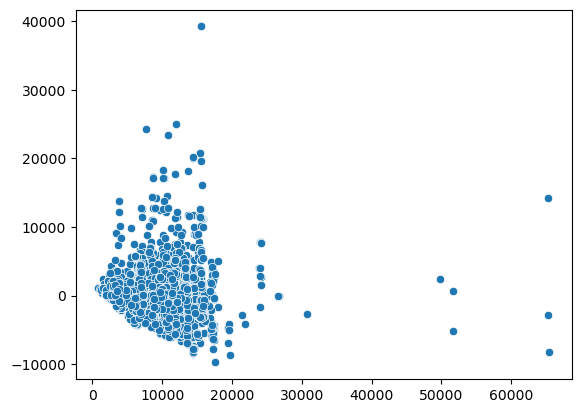

In [317]:
sns.scatterplot(x =Train_predict, y = Residual)

In [332]:
Train_y=train_y['Price'].to_numpy()

<Axes: >

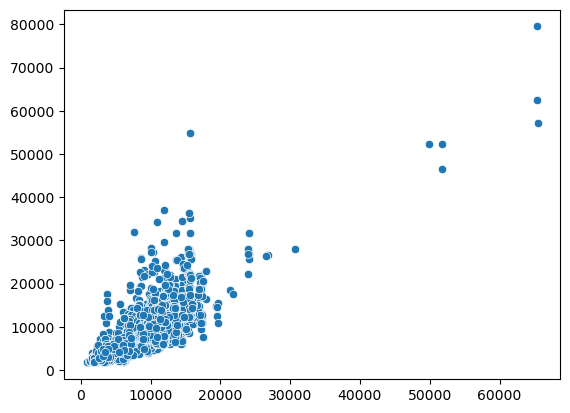

In [333]:
sns.scatterplot(x = Train_predict,y= Train_y)